# Distribuciones de probabilidad
Describe como está distribuida una variable aleatoria. Nos dice qué valores de una variable aleatoria son más probables y también cuáles lo son menos.

Para trabajar con distribuciones teóricas "perfectas" en Python, usaremos la simulación.

In [97]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from distfit import distfit

# Distribución Uniforme

In [7]:
uniform_data = stats.uniform.rvs(size=190000000,  # Generate 100000 numbers
                                 loc = 0,      # From 0
                                 scale=10)     # To 10
np.mean(uniform_data)


4.999874238387796

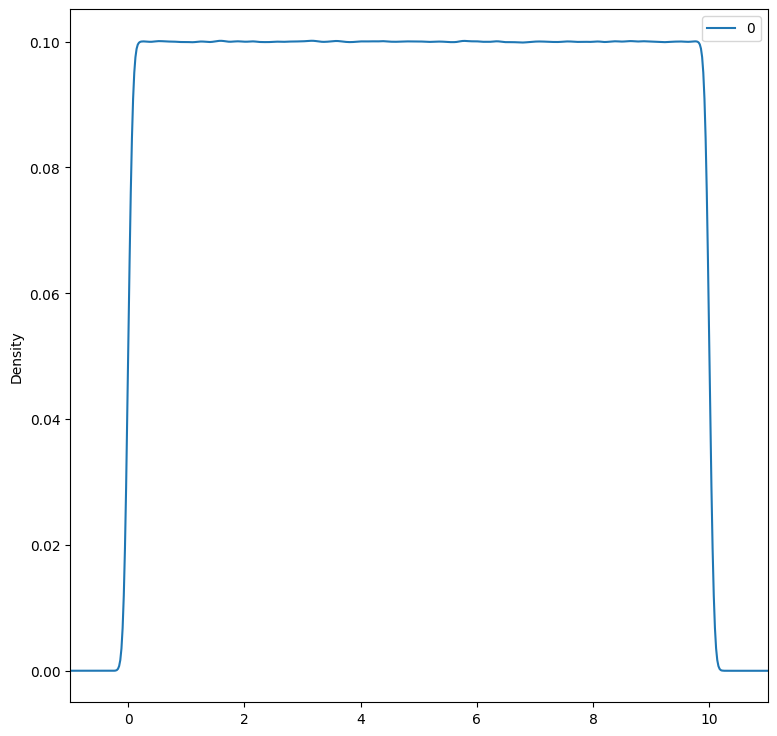

In [8]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

stats.distribution.rvs() genera muestras aleatorias de una distribución concreta. Depende la distribución que estemos trabajando le tendremos que dar unos inputs o otros.

stats.distribution.cdf se usa para determinar la probabilidad de que dicha distribución tome en el valor que le indicamos o uno menor (función de distribución)



In [9]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

stats.distribution.ppf() es la inversa de cdf. Te devuelve el valor de la variable (cuantil) asociado a la probabilidad acumulada que le indiques.

In [14]:
stats.uniform.ppf(q=0.25,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

2.5

stats.distribution.pdf() nos indica la función de densidad (la altura dela función de distribución) dado un valor de x.

In [11]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


La distribución normal o gaussiana es una distribución de probabilidad continua caracterizada por una curva simétrica en forma de campana. Una distribución normal se define por su centro (media) y dispersión (desviación estándar). La mayor parte de las observaciones generadas a partir de una distribución normal se encuentran cerca de la media, que se encuentra en el centro exacto de la distribución: como regla general, alrededor del 68 % de los datos se encuentran dentro de 1 desviación estándar de la media, el 95 % se encuentra dentro de 2 desviaciones estándar y el 99,7% se encuentran dentro de 3 desviaciones estándar.

La distribución normal es quizás la distribución más importante de toda las estadística. Resulta que muchos fenómenos del mundo real, como los puntajes de las pruebas de coeficiente intelectual y las alturas humanas, siguen aproximadamente una distribución normal, por lo que a menudo se usa para modelar variables aleatorias. Muchas pruebas estadísticas comunes asumen que las distribuciones son normales.

El apodo de scipy para la distribución normal es norm. Investiguemos la distribución normal:

In [15]:
prob_under_minus1 = stats.norm.cdf(x= -1,
                                loc = 0,
                                scale= 1)

prob_over_1 = 1 - stats.norm.cdf(x= 1,
                                loc = 0,
                                scale= 1)

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


El resultado muestra que aproximadamente el 16 % de los datos generados por una distribución normal con media 0 y desviación estándar 1 está por debajo de -1, el 16 % está por encima de 1 y el 68 % se encuentra entre -1 y 1, lo que concuerda con 68, 95, regla 99.7.

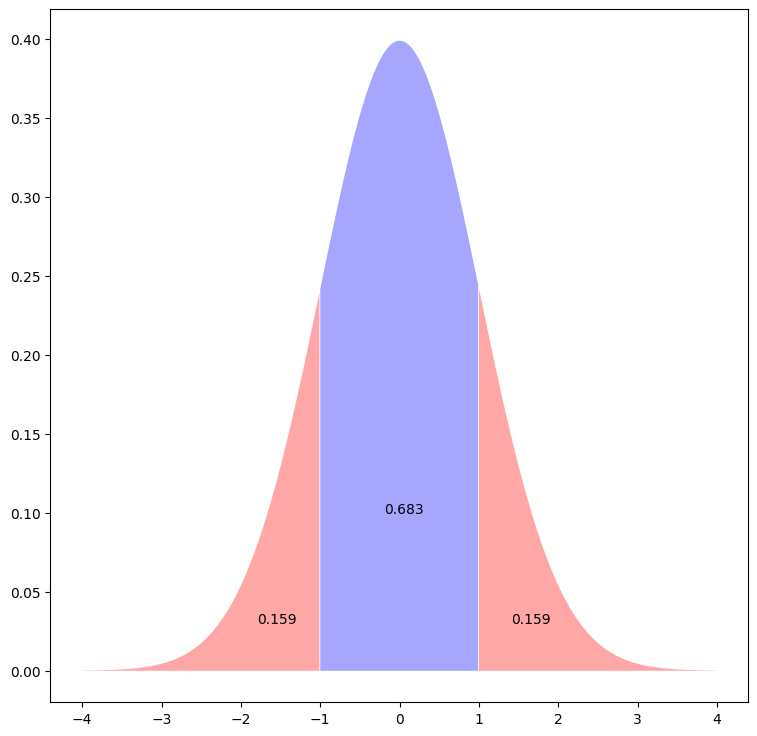

In [16]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

Encontrar cuantiles de la distribución normal es una tarea común cuando se realizan pruebas estadísticas. Se puede comprobar los cuantiles de distribución normal con stats.norm.ppf():

In [17]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


El resultado del cuantil anterior confirma que aproximadamente el 5 % de los datos se encuentran a más de 2 desviaciones estándar de la media.

#Distribución Binomial

La [distribución binomial](https://en.wikipedia.org/wiki/Binomial_distribution) es una distribución de probabilidad discreta que modela los resultados de un número dado de senderos aleatorios de algún experimento o evento. El binomio se define por dos parámetros: la probabilidad de éxito en cualquier intento y el número de intentos. La distribución binomial te dice qué tan probable es lograr un número dado de éxitos en n intentos del experimento. Por ejemplo, podríamos modelar el lanzamiento de una moneda al aire 10 veces con una distribución binomial donde el número de intentos se establece en 10 y la probabilidad de éxito se establece en 0,5. En este caso, la distribución nos diría qué tan probable es obtener cero caras, 1 cara, 2 caras y así sucesivamente.

El nombre de Scipy para el binomio es binomial. Generemos e investiguemos algunos datos binomiales:

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts   6  95  476  1149  2009  2488  2060  1133  466  108  10


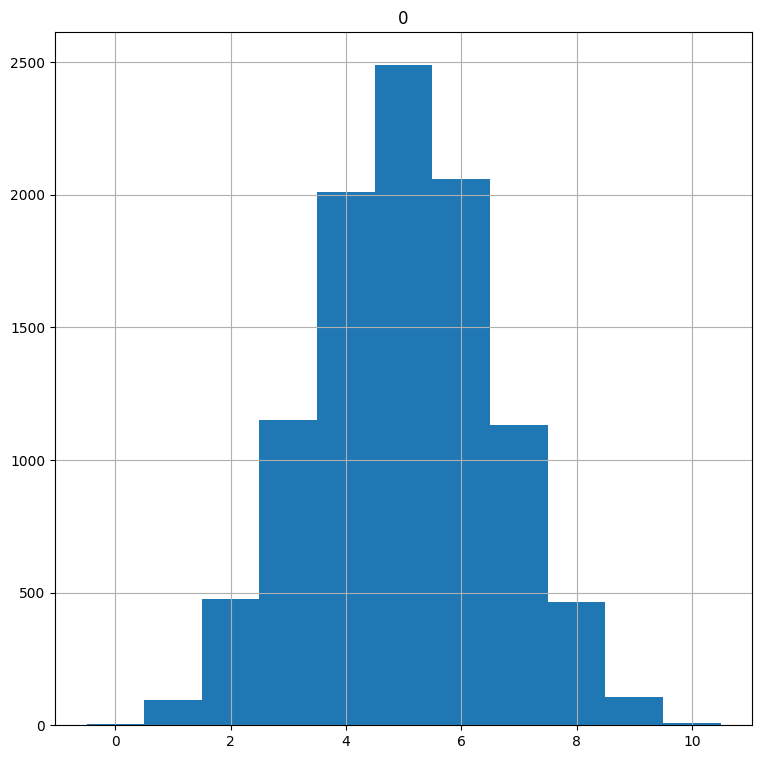

In [33]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Hay que tener en cuenta que dado que la distribución binomial es discreta, solo toma valores enteros, por lo que podemos resumir los datos binomiales con una tabla de frecuencia y su distribución con un histograma. El histograma nos muestra que una distribución binomial con un 50 % de probabilidad de éxito es aproximadamente simétrica, con los resultados más probables en el centro. Esto recuerda a la distribución normal, pero si alteramos la probabilidad de éxito, la distribución no será simétrica:

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   3   9  48  286  883  2042  3087  2575  1067


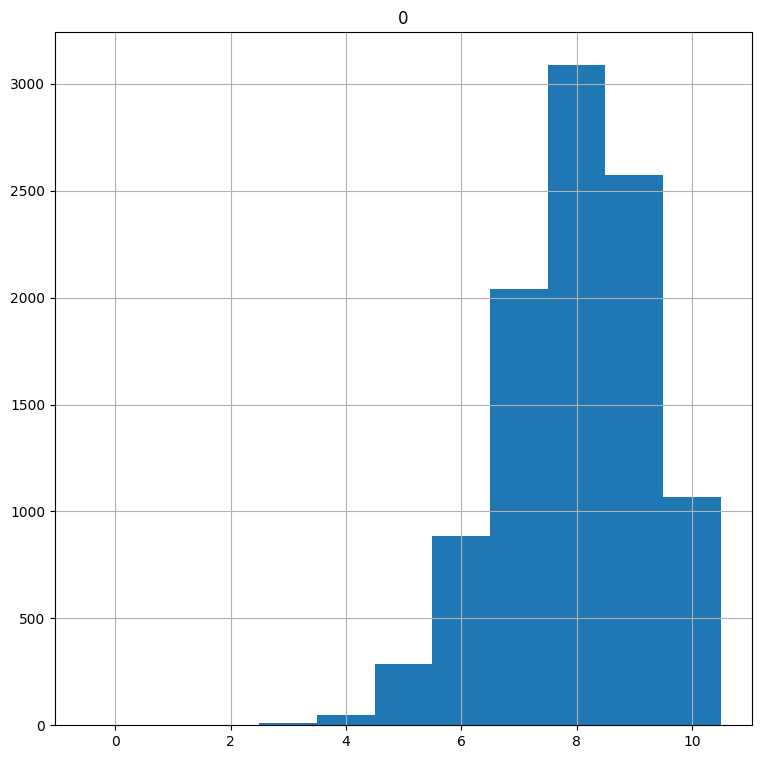

In [19]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

La función cdf() nos permite verificar la probabilidad de lograr una cantidad de éxitos dentro de un cierto rango:

In [34]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [35]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

Para funciones de densidad de probabilidad continuas, se utiliza pmf() para verificar la densidad de probabilidad en un valor x dado. Para distribuciones discretas como la binomial, se usa stats.distribution.pmf() (función de masa de probabilidad) para verificar la masa (proporción de observaciones) en un número dado de éxitos k:

In [36]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.2460937500000002

In [37]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.3019898880000002

#Distribución de Poisson

La distribución de Poisson modela la probabilidad de ver una cierta cantidad de éxitos dentro de un intervalo de tiempo, donde el tiempo que lleva el siguiente éxito se modela mediante una distribución exponencial. La distribución de Poisson se puede usar para modelar el tráfico, como la cantidad de llegadas que un hospital puede esperar en una hora o la cantidad de correos electrónicos que esperaría recibir en una semana.

El nombre de Scipy para la distribución de Poisson es "poisson". Generemos y representemos algunos datos de una distribución de Poisson con una tasa de llegada de 1 por unidad de tiempo:

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3702  3716  1797  614  145  21  5


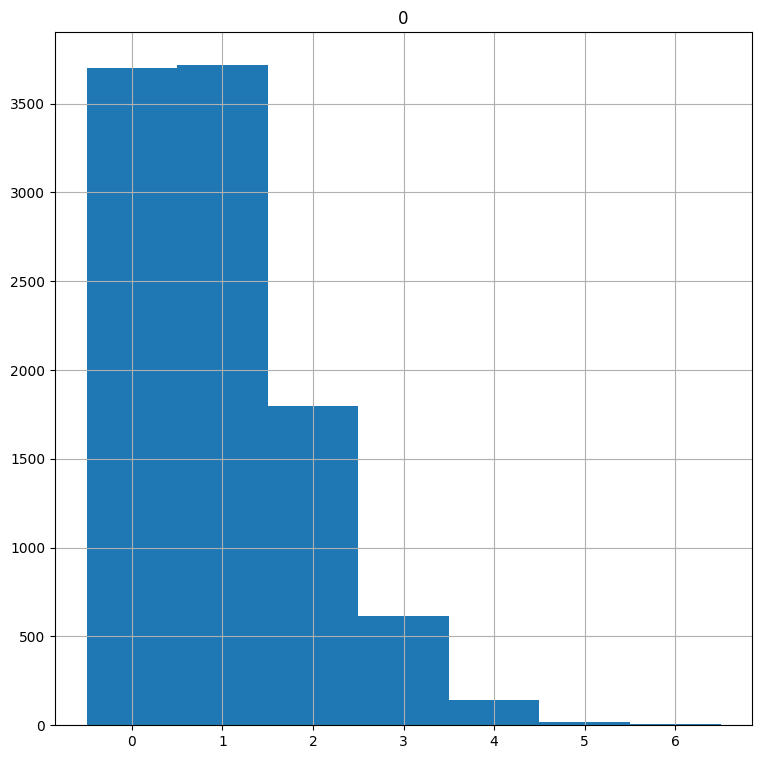

In [38]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

El histograma muestra que cuando las llegadas son relativamente poco frecuentes, es raro ver más de un par de llegadas en cada período de tiempo. Cuando la tasa de llegadas es alta, se vuelve cada vez más raro ver un número bajo de llegadas y la distribución comienza a verse más simétrica:

col_0   1   2   3    4    5    6    7     8     9     10  ...   16   17  18  \
row_0                                                     ...                 
counts   8  21  80  221  368  663  852  1114  1243  1245  ...  242  130  71   

col_0   19  20  21  22  23  25  27  
row_0                               
counts  22  18  10   3   5   1   1  

[1 rows x 25 columns]


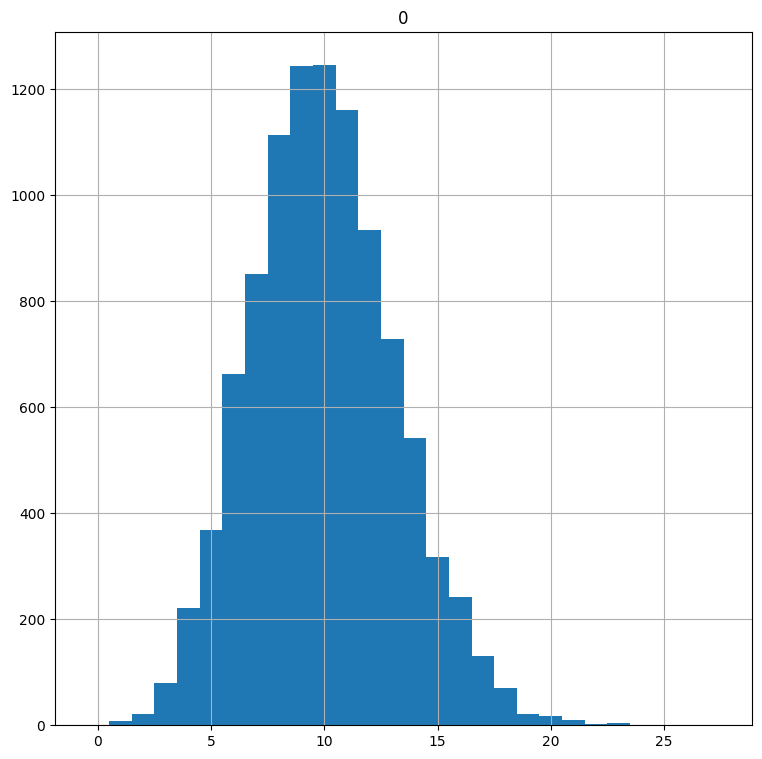

In [39]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

Al igual que con otras distribuciones de probabilidad discretas, podemos usar cdf() para verificar la probabilidad de lograr más o menos de un cierto número de éxitos y pmf() para verificar la probabilidad de obtener un número específico de éxitos:

In [40]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [41]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

#Ejercicio
Buscad información de la distribución exponecial y su relación con la Poisson:

#Ejemplos exponencial:

In [54]:
 #Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

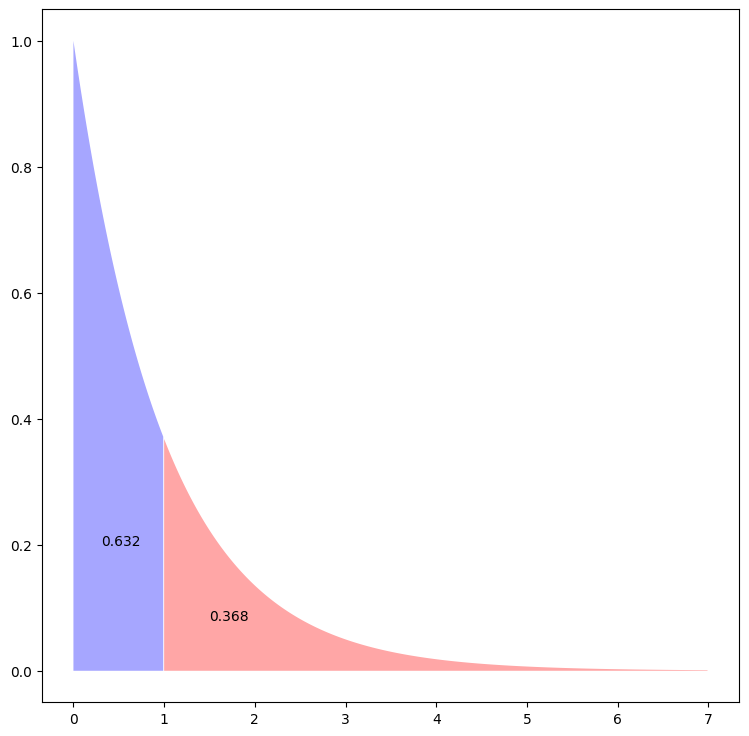

In [55]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));


In [107]:
obesity_all = pd.read_csv("./features_v1")

obesity_all

obesity_all.describe()

,Unnamed: 0,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,11434.000000,0.498666,0.819450,0.911627,1.849316,0.012637,0.034238,2.227426,2.493769,0.210325,0.472410,0.363937,0.721714,0.584781,0.513721,0.328127,0.310275,30.191840
std,6601.855989,0.500009,0.384653,0.283843,0.450872,0.111705,0.181845,0.477871,1.160286,0.122413,0.165813,0.196748,0.266664,0.237570,0.304450,0.279822,0.301425,8.305989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.868541
25%,5717.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.127660,0.342758,0.201493,0.500000,0.666667,0.377953,0.005287,0.000000,24.092971
50%,11434.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.187562,0.471698,0.335821,0.696333,0.666667,0.500000,0.333333,0.289770,29.384757
75%,17151.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.255319,0.590621,0.541278,1.000000,0.666667,0.767564,0.532192,0.500000,36.878525
max,22868.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.997991


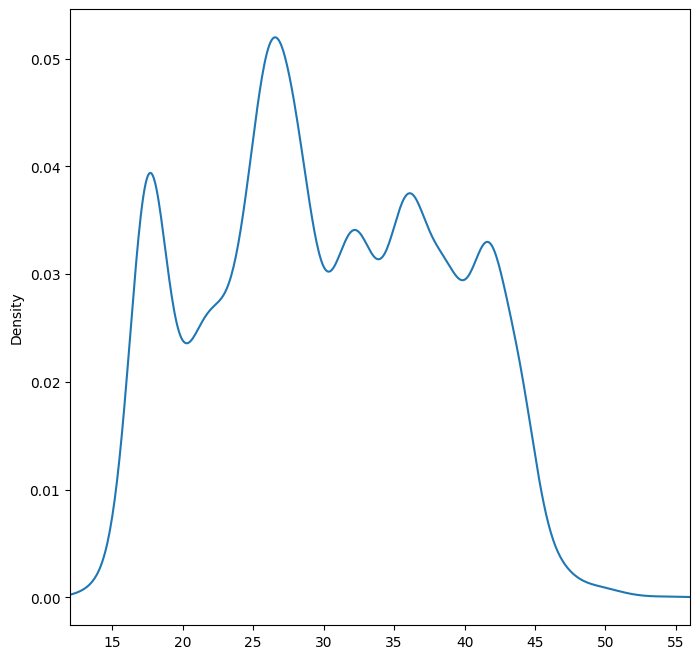

In [60]:
obesity_all["BMI"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (12,56));

<Axes: >

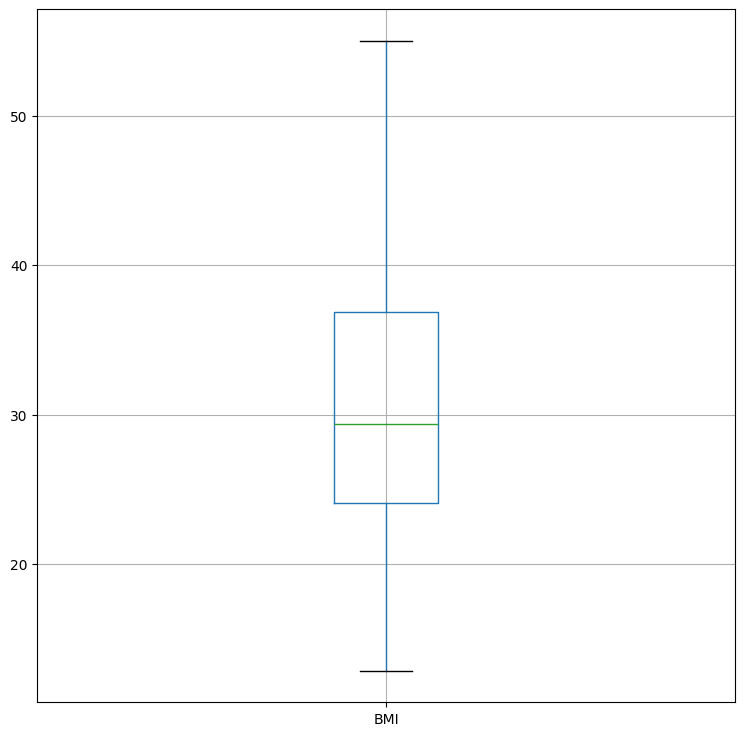

In [61]:
obesity_all.boxplot(column='BMI')

<Axes: >

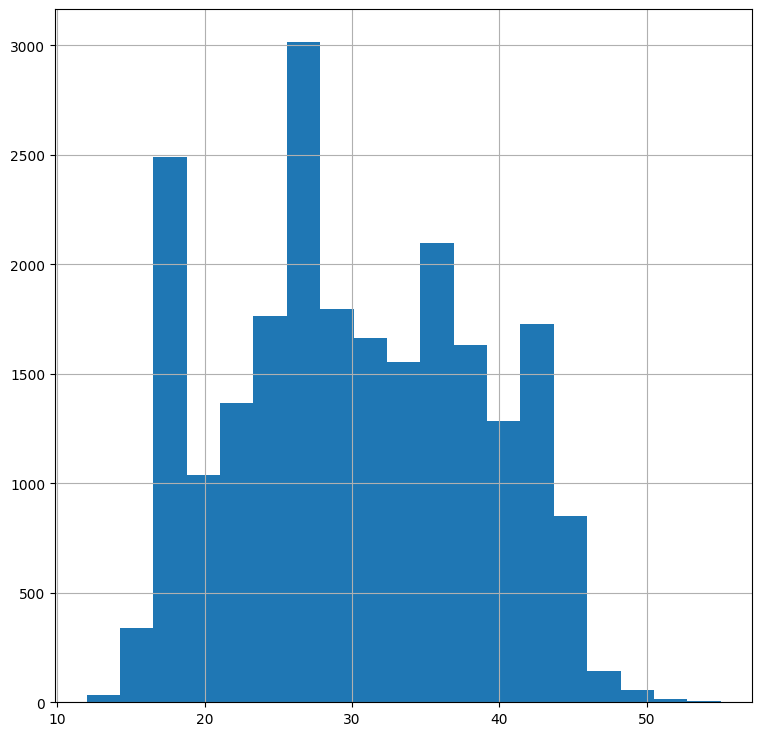

In [96]:
obesity_all['BMI'].hist(range=(12,55), bins=19)

In [70]:
obesity_0 = obesity_all[obesity_all['Gender'] != 1]
obesity_0.head()


,Unnamed: 0,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
0,0,0,1,0,2,0,0,3,3,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,24.386526
1,1,0,1,0,2,1,1,2,3,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,24.238227
6,6,0,1,1,2,0,0,2,2,0.191489,0.094340,0.119403,1.0,0.666667,0.5,0.333333,0.0,24.444444
11,11,0,1,1,1,0,1,2,3,0.148936,0.509434,0.305970,0.5,0.666667,0.5,0.666667,0.5,27.041644
15,15,0,1,0,0,0,1,2,3,0.170213,0.471698,0.201493,1.0,0.666667,0.5,0.666667,0.5,22.837370


In [69]:
obesity_0.describe()

,Unnamed: 0,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,11465.000000,11465.0,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000
mean,11458.192324,0.0,0.782468,0.904230,1.826603,0.005844,0.046140,2.210990,2.655560,0.202421,0.369402,0.339904,0.803962,0.574801,0.496012,0.262862,0.293768,30.921813
std,6616.858564,0.0,0.412585,0.294288,0.455379,0.076225,0.209798,0.449336,0.983145,0.118322,0.131110,0.222235,0.268835,0.250685,0.326055,0.274530,0.274251,9.708974
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.929102
25%,5695.000000,0.0,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.122042,0.283019,0.141791,0.500000,0.666667,0.219981,0.000000,0.000000,22.100290
50%,11434.000000,0.0,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.170213,0.358491,0.305970,1.000000,0.666667,0.500000,0.264310,0.277075,30.069470
75%,17227.000000,0.0,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.255319,0.470883,0.536733,1.000000,0.666667,0.810939,0.481461,0.500000,41.263830
max,22863.000000,0.0,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.906445,0.940726,1.000000,1.000000,1.000000,1.000000,1.000000,54.997991


In [65]:
obesity_1 = obesity_all[obesity_all['Gender'] != 0]
obesity_1.head()

,Unnamed: 0,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
2,2,1,1,0,2,0,0,1,3,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,23.765432
3,3,1,0,0,2,0,0,1,4,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,26.851852
4,4,1,0,0,2,0,0,2,3,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,28.342381
5,5,1,0,1,2,0,0,2,0,0.319149,0.320755,0.104478,0.5,0.666667,0.5,0.000000,0.0,20.195092
7,7,1,0,0,2,0,0,2,3,0.170213,0.358491,0.104478,0.5,0.666667,0.5,1.000000,0.0,19.705532


In [71]:
obesity_1.describe()

,Unnamed: 0,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,11404.000000,11404.0,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000
mean,11409.678271,1.0,0.856629,0.919063,1.872150,0.019467,0.022273,2.243949,2.331112,0.218270,0.575969,0.388099,0.639027,0.594815,0.531525,0.393742,0.326872,29.457962
std,6586.939275,0.0,0.350466,0.272750,0.445149,0.138165,0.147576,0.504416,1.294343,0.125899,0.128305,0.163747,0.237293,0.223174,0.279948,0.269571,0.325641,6.520060
min,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011974,0.018301,0.000000,0.000000,0.000000,0.000000,0.000000,12.868541
25%,5735.750000,1.0,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.127660,0.472032,0.268657,0.500000,0.659867,0.500000,0.260614,0.000000,25.295567
50%,11434.500000,1.0,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.191489,0.577317,0.378162,0.500000,0.666667,0.500000,0.333333,0.315609,29.119573
75%,17072.250000,1.0,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.276596,0.660377,0.546848,0.883306,0.666667,0.658293,0.644287,0.500000,35.440021
max,22868.000000,1.0,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.472390


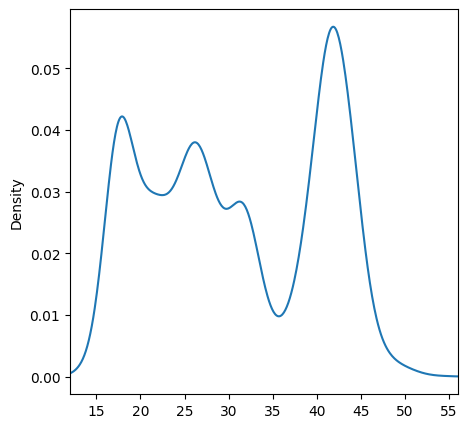

In [87]:
obesity_0["BMI"].plot(kind="density",  # Create density plot
                      figsize=(5,5),    # Set figure size
                      xlim= (12,56));

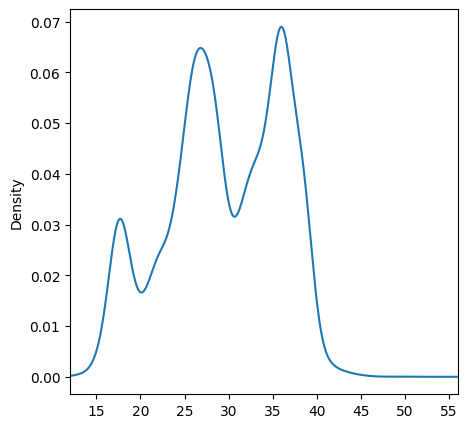

In [88]:
obesity_1["BMI"].plot(kind="density",  # Create density plot
                      figsize=(5,5),    # Set figure size
                      xlim= (12,56));

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00795911] [loc=30.192 scale=8.306]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0210251] [loc=12.869 scale=17.323]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0210251] [loc=-2147483635.131 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.07 sec] [RSS: 0.00724786] [loc=30.242 scale=7.896]
[distfit] >INFO> [t         ] [0.68 sec] [RSS: 0.00796184] [loc=30.194 scale=8.304]
[distfit] >INFO> [genextreme] [0.29 sec] [RSS: 0.00758382] [loc=27.274 scale=8.168]
[distfit] >INFO> [gamma     ] [0.13 sec] [RSS: 0.00792776] [loc=-177.600 scale=0.332]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00791279] [loc=-110.368 scale=140.314]
[distfit] >INFO> [beta      ] [0.31 sec] [RSS: 0.00656109] [loc=12.655 scale=42.433]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0156162] [loc=12.869 scale=42.129]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 0.00793249] [loc=-1609.578 scale=243.125]

          name     score                loc         scale  \
0         beta  0.006561          12.655418     42.432784   
1     dweibull  0.007248          30.241949      7.896159   
2   genextreme  0.007584          27.273692      8.168275   
3      lognorm  0.007913        -110.367984    140.314431   
4        gamma  0.007928        -177.599647       0.33182   
5     loggamma  0.007932       -1609.578252    243.124782   
6         norm  0.007959           30.19184      8.305807   
7            t  0.007962           30.19427      8.304138   
8      uniform  0.015616          12.868541     42.129451   
9        expon  0.021025          12.868541     17.323299   
10      pareto  0.021025 -2147483635.131459  2147483648.0   

                                        arg  \
0   (2.2477165127812624, 3.236400508234672)   
1                     (1.6188542260627914,)   
2                     (0.2886103494926719,)   
3                    (0.05913664071990394,)   
4                      (626.1930

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=2.24772, b=3.2364, loc=12.6554, scale=42.4328)'}, xlabel='Values', ylabel='Frequency'>)

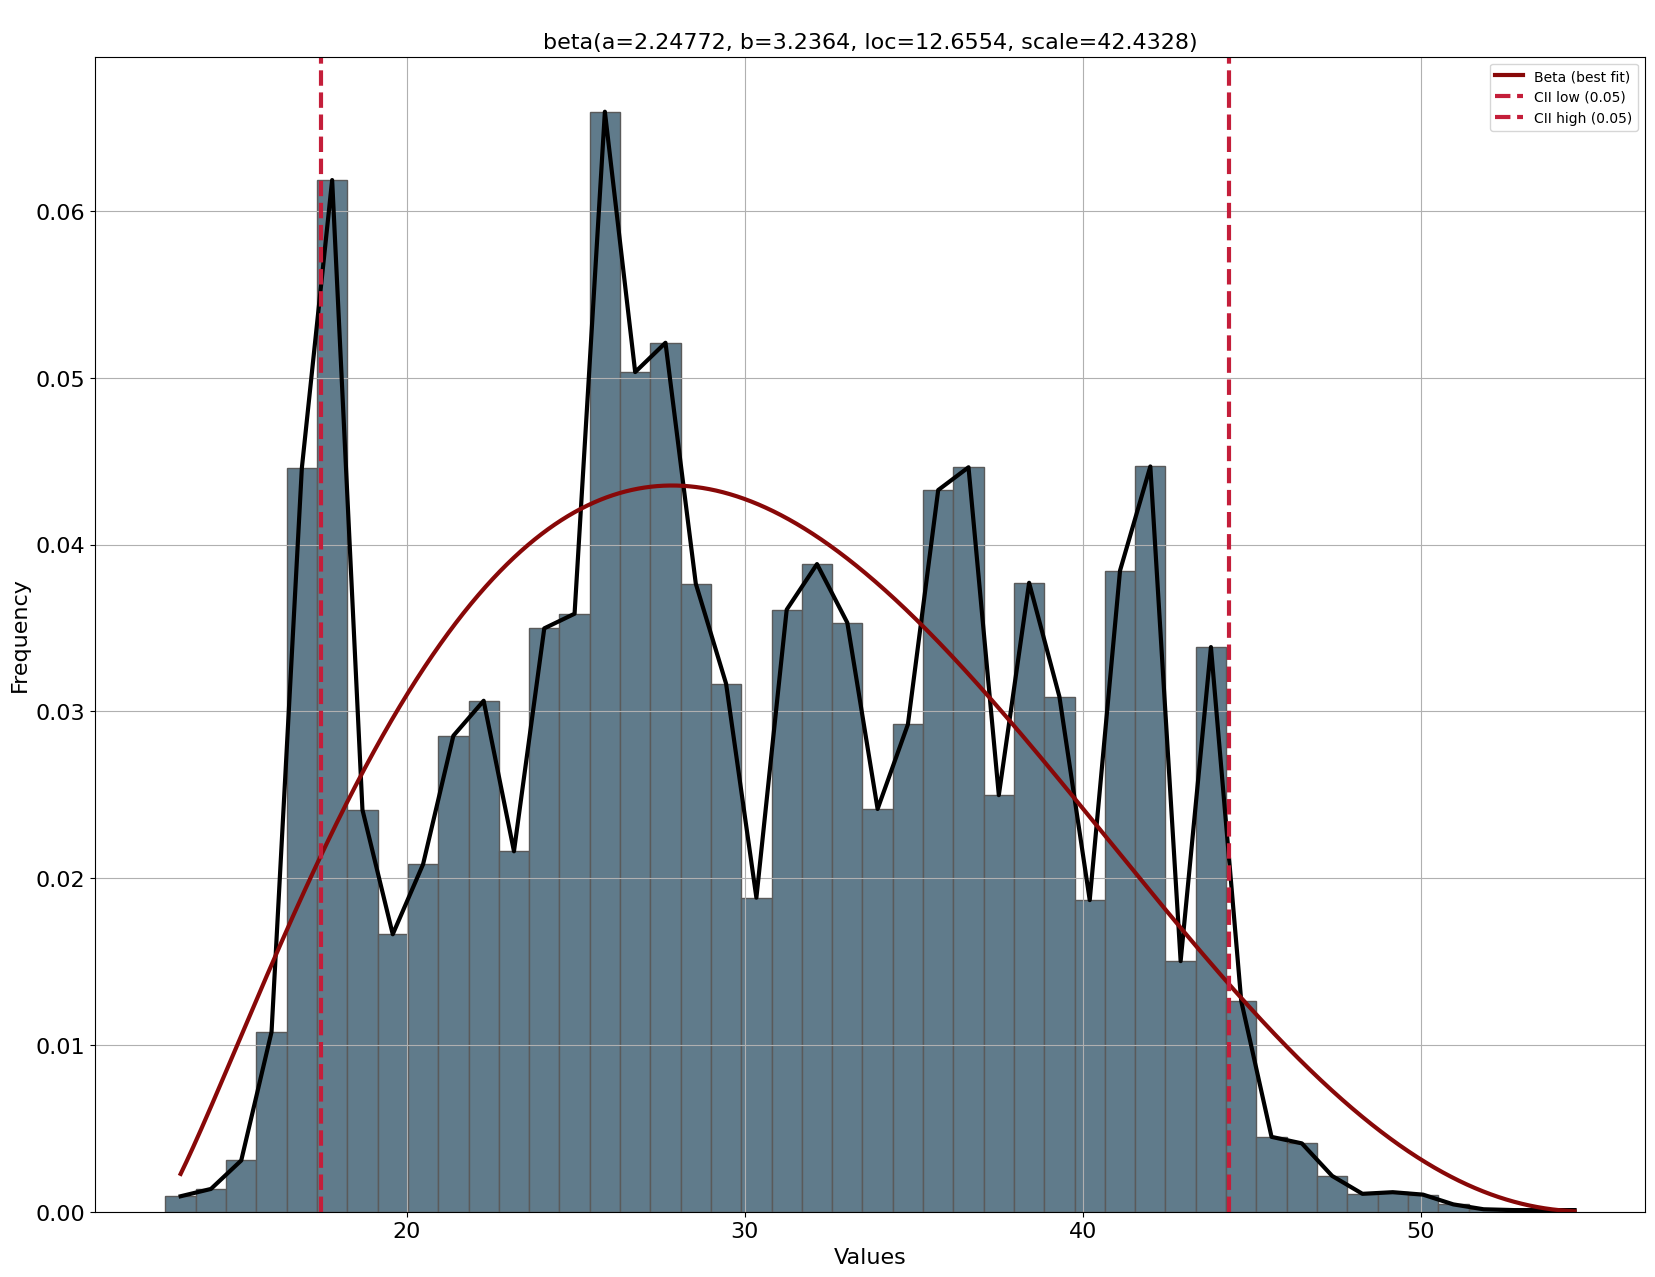

In [105]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your BMI data
dist.fit_transform(obesity_all['BMI'])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()